In [2]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('..')
import script.data as data

In [3]:
ticker = '000975'

In [4]:
income = data.get_IS(ticker)
incomeq = data.get_ISQ(ticker)
income.rename(columns={'归属于母公司所有者的净利润': '净利润'}, inplace=True)
incomeq.rename(columns={'归属于母公司所有者的净利润': '净利润'}, inplace=True)

In [5]:
change = income[['营业总收入', '营业总成本', '净利润']].pct_change(periods=-1).round(3) * 100
income_change = pd.concat([income[['截止日期', '净利润', '基本每股收益', '稀释每股收益']], change], axis=1)
income_change

,截止日期,净利润,基本每股收益,稀释每股收益,营业总收入,营业总成本,净利润
13627,2019-12-31,8.641654e+08,0.4390,0.4390,6.7,3.8,30.4
13628,2018-12-31,6.625728e+08,0.3344,0.3344,116.7,136.6,96.8
13630,2017-12-31,3.367030e+08,0.2084,0.2084,192.3,289.7,53.3
13632,2016-12-31,2.196436e+08,0.2031,0.2031,4.2,13.7,-11.4
13635,2015-12-31,2.479134e+08,0.2286,0.2286,0.7,6.3,-8.3
13638,2014-12-31,2.704998e+08,0.2492,0.2492,22.3,24.4,-42.0
13640,2013-12-31,4.662539e+08,0.4453,0.4453,131.8,18.7,2781.5
13642,2012-12-31,1.618117e+07,0.0260,0.0260,5.3,7.9,-46.0
13645,2011-12-31,2.997094e+07,0.0481,0.0481,5.1,-8.4,-231.1
13649,2010-12-31,-2.285615e+07,-0.0367,-0.0367,-1.2,-6.7,-252.1


In [6]:
change = incomeq[['营业收入', '净利润']].pct_change(periods=-4).round(3) * 100
incomeq_change = pd.concat([incomeq[['截止日期', '营业收入', '净利润']], change], axis=1)
incomeq_change[:12]

,截止日期,营业收入,净利润,营业收入,净利润
24774,2020-06-30,1.863424e+09,3.357447e+08,33.1,25.4
24775,2020-03-31,1.938924e+09,2.742898e+08,71.8,61.1
24776,2019-12-31,1.273253e+09,2.058142e+08,10.7,12.4
24777,2019-09-30,1.347493e+09,2.202860e+08,-14.7,6.5
24778,2019-06-30,1.399906e+09,2.677529e+08,12.1,71.3
24779,2019-03-31,1.128299e+09,1.703123e+08,33.1,46.3
24780,2018-12-31,1.150236e+09,1.831390e+08,44.5,85.8
24781,2018-09-30,1.580165e+09,2.067532e+08,154.3,56.4
24782,2018-06-30,1.248404e+09,1.562794e+08,135.7,61.9
24783,2018-03-31,8.474318e+08,1.164012e+08,202.3,1140.4


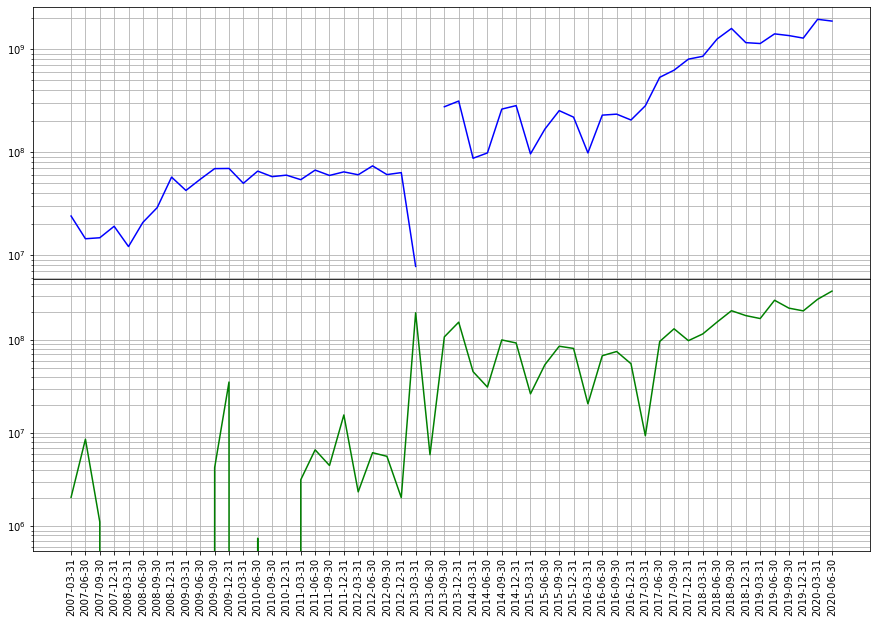

In [7]:
plt.figure(figsize=(15,10))
ax = plt.subplot(211)
plt.plot(incomeq['截止日期'][::-1], incomeq['营业收入'][::-1], 'b-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
ax = plt.subplot(212)
plt.plot(incomeq['截止日期'][::-1], incomeq['净利润'][::-1], 'g-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=.0)
plt.show()

In [8]:
df = data.get_market(ticker)
df.groupby(df['交易日期'].dt.year).agg(['min', 'max'])[-10:]

交易日期               收盘价          累积前复权因子               滚动市盈率  \
            min        max    min    max       min       max       min   
交易日期                                                                     
2011 2011-01-04 2011-12-30   4.76  11.26  0.457824  0.457824 -705.2873   
2012 2012-01-04 2012-12-31   4.33  11.35  0.457824  0.458551   89.9961   
2013 2013-01-04 2013-12-31   8.01  12.20  0.458551  0.464945   19.8369   
2014 2014-01-02 2014-12-31   7.47  18.22  0.464945  0.476189   18.7427   
2015 2015-01-05 2015-12-31   9.00  27.06  0.476189  0.481641   35.5064   
2016 2016-01-04 2016-12-30   7.71  17.30  0.481641  0.490204   33.6378   
2017 2017-01-03 2017-12-29  12.10  17.36  0.490204  0.490204   46.7185   
2018 2018-01-02 2018-12-28   6.80  16.70  0.490204  0.694978   26.4473   
2019 2019-01-02 2019-12-31   9.24  17.00  0.694978  0.705516   25.5782   
2020 2020-01-02 2020-10-19  10.20  19.73  0.705516  1.000000   26.9678   

                
           max  
交易日期            
2011  463.2307  
2012  388.0493  
2013  818.4793  
2014   61.3618  
2015  116.9626  
2016   76.2970  
2017   79.1353  
2018   82.9465  
2019   44.5681  
2020   40.4196